In [95]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

In [96]:
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('stopwords')
from nltk.util import pr
from nltk.tokenize import TweetTokenizer
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))
nltk.download('rslp')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [97]:
import tensorflow
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.utils import to_categorical

In [98]:
#importing accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [99]:
#loading data
df2 =  pd.read_csv('labeled_data.csv')

In [100]:
print(df2)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @m

In [101]:
df2['class'].unique()

array([2, 1, 0], dtype=int64)

In [102]:
# creating a new feature and renmaing the values in the class feature
df2['label'] = df2['class'].map({0:"Hate Speech Detected", 1:"Offensive Language Detected", 2:"No Hate Speech And No Offensive Language"})

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
 7   label               24783 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.5+ MB


In [104]:
df2.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
label                 0
dtype: int64

In [105]:
#sub-setting data
data = df2[['tweet', 'label']]
data

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate Speech And No Offensive Language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language Detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language Detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language Detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language Detected
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language Detected
24779,"you've gone and broke the wrong heart baby, an...",No Hate Speech And No Offensive Language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language Detected
24781,youu got wild bitches tellin you lies,Offensive Language Detected


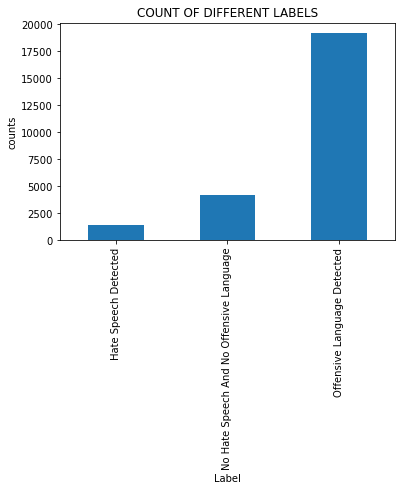

In [106]:
#plot of count of labels
df2.groupby('label')['tweet'].count().plot(kind='bar')
plt.ylabel("counts")
plt.xlabel("Label")
plt.title("COUNT OF DIFFERENT LABELS");

In [107]:
# function to remove special characters
def remove_special_characters(text):
    # Define the pattern to match any non-alphanumeric or space characters
    pattern = r'[^a-zA-Z0-9\s]'
    
    # Use re.sub to replace the matched pattern with an empty string
    text = re.sub(pattern, '', text)
    text = str.lower(text)
    return text

In [108]:
data['tweet'] = data['tweet'].apply(remove_special_characters)

In [109]:
# defining the target variable
x = np.array(data['tweet'])
y = np.array(data['label'])

# instanciating the count vectorizer
cv = CountVectorizer()

# fitting features into vectorizer
x = cv.fit_transform(x)

# spliting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [110]:
# instantiating the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
# predicting using the decision tree classifier
pred = clf.predict(X_test)

In [112]:
#instanciating random forest classifier
model = RandomForestClassifier()

In [113]:
# traing model on train data
model.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
# predictiong with random forest
pt = model.predict(X_test)

In [115]:
# instanciating logistic regression model
model2 = LogisticRegression()
model2.fit(X_train, y_train)
pt2 = model2.predict(X_test)

In [116]:
#instanciating k neighbors classifier
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)
pt3 = model3.predict(X_test)

# Tuning and chosing best parameters for decision tree classifier model.

In [117]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [118]:
pred4 = grid_search.predict(X_test)

In [119]:
accuracy_score(y_test, pred4)

0.8053258018963082

In [120]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [121]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

grid_search_best_param = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_best_param.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [None],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [10]},
             scoring='accuracy')

In [122]:
pred5 = grid_search_best_param.predict(X_test)

In [123]:
accuracy_score(y_test, pred5)

0.8105709098244906

# logistic regression tuning

In [124]:
model4= LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 42)
model4.fit(X_train, y_train)
pt4 = model4.predict(X_test)

In [125]:
# fuction to that catigorize any sentence
def check(text,model):
    text = cv.transform([text]).toarray()
    pred = model.predict(text)
    return(pred[0])

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)

accuracy is:  0.8890457938269114


In [128]:
modelss = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier(grid_search)', 'DecisionTreeClassifier(grid_search_best_param)', 'LogisticRegression (tuned)', 'AdaBoostClassifier']
word = ['go kill yourself', 'go kill yourself', 'go kill yourself', 'go kill yourself', 'go kill yourself', 'go kill yourself', 'go kill yourself', 'go kill yourself']
category = [check('go kill yourself',model = clf), check('go kill yourself',model = model), check('go kill yourself',model = model2), check('go kill yourself',model = model3), check('go kill yourself',model = grid_search), check('go kill yourself',model = grid_search_best_param), check('go kill yourself',model = model4),check('go kill yourself', model = ada)]
dt = pd.DataFrame({
    'Model': modelss,
    'Words': word,
    'Category': category
})

# Display the dataframe
dt.head(8)

,Model,Words,Category
0,DecisionTreeClassifier,go kill yourself,Hate Speech Detected
1,RandomForestClassifier,go kill yourself,Offensive Language Detected
2,LogisticRegression,go kill yourself,Offensive Language Detected
3,KNeighborsClassifier,go kill yourself,Offensive Language Detected
4,DecisionTreeClassifier(grid_search),go kill yourself,Offensive Language Detected
5,DecisionTreeClassifier(grid_search_best_param),go kill yourself,Offensive Language Detected
6,LogisticRegression (tuned),go kill yourself,Hate Speech Detected
7,AdaBoostClassifier,go kill yourself,Hate Speech Detected


In [129]:
models = ['DecisionTreeClassifier', 'RandomForestClassifier','LogisticRegression', 'KNeighborsClassifier', 'LogisticRegression (tuned)']
accuracy_scores = [accuracy_score(y_test, pred), accuracy_score(y_test, pt),accuracy_score(y_test, pt2), accuracy_score(y_test, pt3), accuracy_score(y_test, pt4)]

# Create a dataframe
df = pd.DataFrame({
    'Model': models,
    'Accuracy Score': accuracy_scores
})

# Display the dataframe
df.head()

,Model,Accuracy Score
0,DecisionTreeClassifier,0.879564
1,RandomForestClassifier,0.862417
2,LogisticRegression,0.894493
3,KNeighborsClassifier,0.825096
4,LogisticRegression (tuned),0.894694


# USING LSTM MODEL

In [150]:
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(data['tweet']).toarray()
y = data['label']


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)


In [154]:
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [155]:
y_train=to_categorical(y_train, num_classes = 3, dtype='float32')
y_test=to_categorical(y_test, num_classes = 3, dtype='float32')

In [156]:
model = Sequential()
model.add(Embedding(232337, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25


272/272 [==============================] - 126s 433ms/step - loss: 0.4281 - accuracy: 0.7719 - val_loss: 0.4025 - val_accuracy: 0.7743
Epoch 2/25
272/272 [==============================] - 119s 436ms/step - loss: 0.4024 - accuracy: 0.7743 - val_loss: 0.4032 - val_accuracy: 0.7743
Epoch 3/25
272/272 [==============================] - 123s 452ms/step - loss: 0.4010 - accuracy: 0.7743 - val_loss: 0.4000 - val_accuracy: 0.7743
Epoch 4/25
272/272 [==============================] - 121s 446ms/step - loss: 0.3999 - accuracy: 0.7743 - val_loss: 0.3998 - val_accuracy: 0.7743
Epoch 5/25
272/272 [==============================] - 123s 451ms/step - loss: 0.3998 - accuracy: 0.7743 - val_loss: 0.3998 - val_accuracy: 0.7743
Epoch 6/25
272/272 [==============================] - 121s 446ms/step - loss: 0.3988 - accuracy: 0.7743 - val_loss: 0.3995 - val_accuracy: 0.7743
Epoch 7/25
272/272 [==============================] - 122s 448ms/step - loss: 0.3980 - accuracy: 0.7743 - val_loss: 0.3990

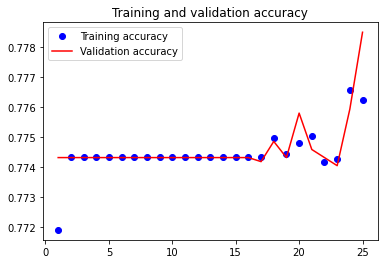

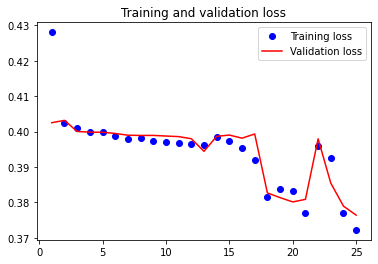

In [157]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()